In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

### Importing Dataset

In [2]:
data_path = "/Users/surendra/gen-ai-jlr/engine_data.csv"

In [3]:
df = pd.read_csv(data_path)
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
df.describe().round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000
mean,791.239,3.304,6.656,2.335,77.643,78.427,0.631
std,267.611,1.022,2.761,1.036,3.111,6.207,0.483
min,61.000,0.003,0.003,0.002,71.322,61.673,0.000
25%,593.000,2.519,4.917,1.600,75.726,73.895,0.000
50%,746.000,3.162,6.202,2.167,76.817,78.347,1.000
75%,934.000,4.055,7.745,2.849,78.072,82.915,1.000
max,2239.000,7.266,21.138,7.479,89.581,195.528,1.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [6]:
df['Engine Condition'].value_counts()
# "0" Engine in a normal or healthy condition
# "1" Engine in a faulty or problematic condition

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

## Check for outliers ( Increase the accuracy )

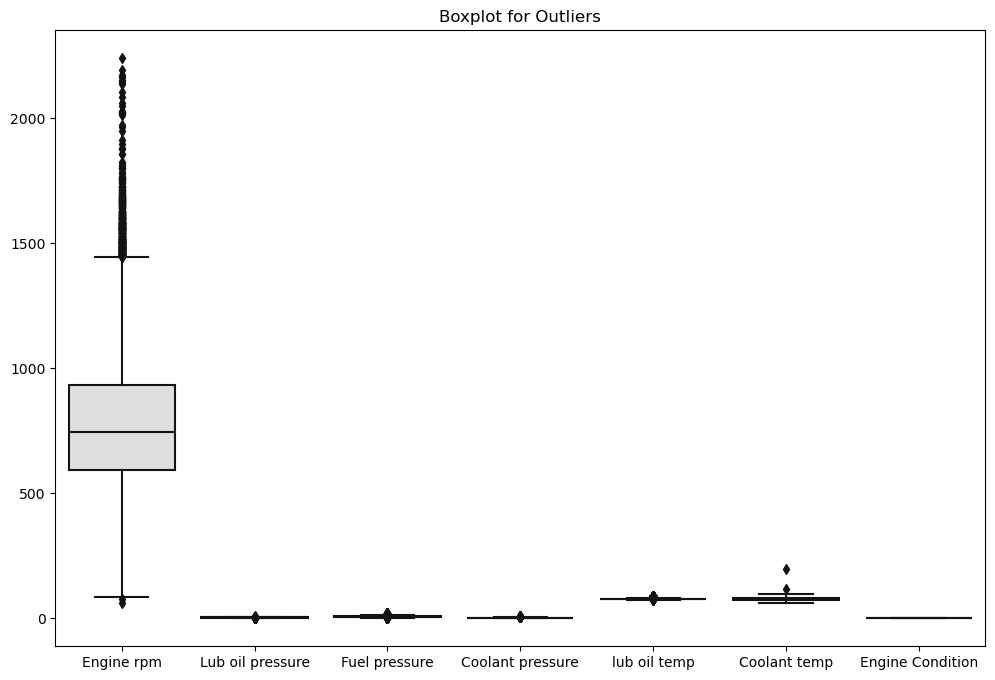

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='binary')
plt.title("Boxplot for Outliers")
plt.show()

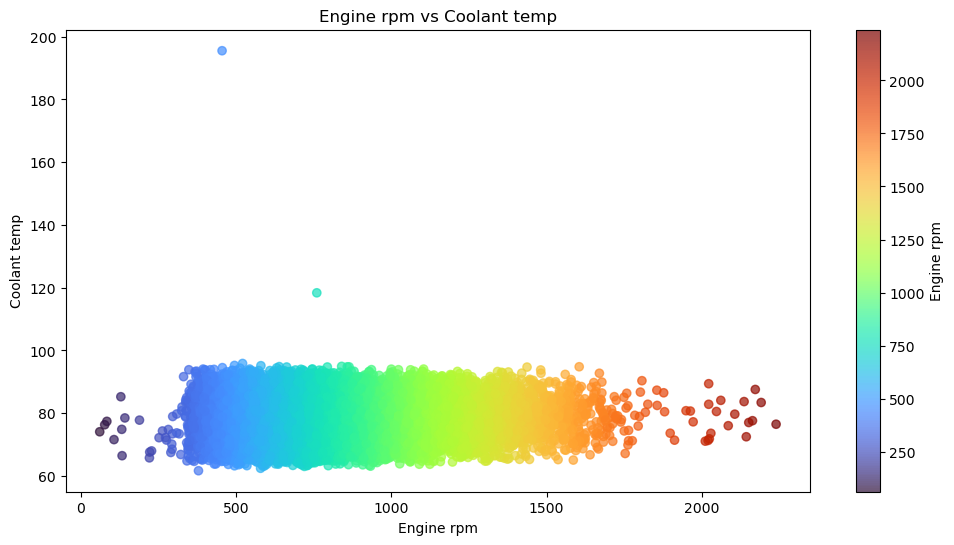

In [8]:
plt.figure(figsize =(12, 6))
scatter = plt.scatter(
    df["Engine rpm"],
    df["Coolant temp"],
    c = df["Engine rpm"],
    cmap = 'turbo',
    alpha = 0.7
)
plt.colorbar(scatter, label = 'Engine rpm')
plt.title("Engine rpm vs Coolant temp")
plt.xlabel("Engine rpm")
plt.ylabel("Coolant temp")
plt.show()

### Using IQD technique ( Inter Quantile Range )

In [9]:
df_temp = df.drop(columns=["Engine Condition"])
df_temp

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225
...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396


In [10]:
Q1 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.25)
print(Q1)
print("-------------------------------")
Q3 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.75)
print(Q3)

Engine rpm      593.000000
Coolant temp     73.895421
Name: 0.25, dtype: float64
-------------------------------
Engine rpm      934.000000
Coolant temp     82.915411
Name: 0.75, dtype: float64


In [11]:
IQR = Q3 - Q1
print(IQR)

Engine rpm      341.00000
Coolant temp      9.01999
dtype: float64


In [13]:
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
print("-------------------------------")
upper_limit = Q3 + 1.5*IQR
print(upper_limit)

Engine rpm      81.500000
Coolant temp    60.365435
dtype: float64
-------------------------------
Engine rpm      1445.500000
Coolant temp      96.445397
dtype: float64


In [14]:
outlier_mask = (df[['Engine rpm', 'Coolant temp']] < lower_limit) | (df[['Engine rpm', 'Coolant temp']] > upper_limit)
outliers = df[outlier_mask.any(axis=1)]
outliers

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
55,1674,2.501620,3.624157,2.043075,76.772327,74.641940,0
88,1776,3.648060,5.873874,1.318790,76.481421,71.233786,0
102,1481,3.972600,5.701680,1.556111,75.997690,93.791609,0
108,1661,3.518121,11.802902,2.951991,76.725921,72.872725,0
143,1620,1.536989,6.398304,2.423895,75.163334,77.340058,0
...,...,...,...,...,...,...,...
19241,2136,3.311171,7.282090,1.678657,75.783308,83.707670,1
19357,1556,4.786442,7.678463,4.029723,78.774495,71.273450,0
19409,1586,5.044422,8.794704,2.523254,77.276628,70.349750,1
19447,1807,3.727537,14.140429,4.446769,77.008190,90.369222,1


In [15]:
percentage = (466/19535)*100
print("Data loss due to outlier :", percentage)  # That's Okay

Data loss due to outlier : 2.385461991297671


### Removing Outliers

In [16]:
df_cleaned = df[~outlier_mask.any(axis=1)]
df_cleaned

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


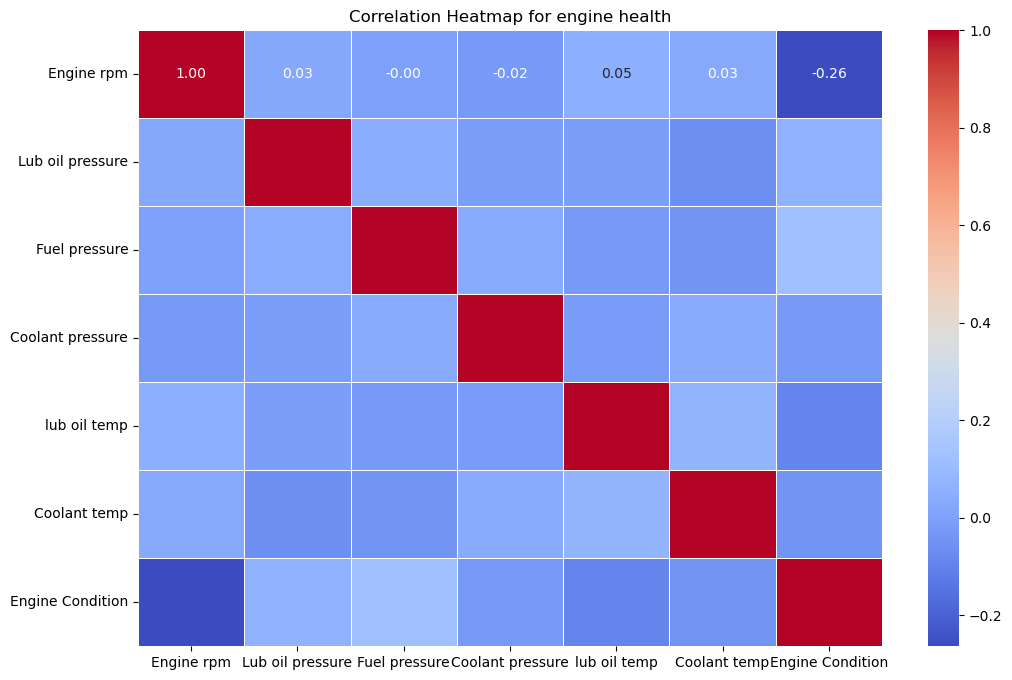

In [17]:
correlation = df_cleaned.corr()

plt.figure(figsize =(12, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Heatmap for engine health")
plt.show()
# All the features have weak correlations with the target variable Engine Condition.
#This suggests that none of these features alone strongly predict the engine condition

In [18]:
df_cleaned.round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.494,11.791,3.179,84.144,81.632,1
1,876,2.942,16.194,2.465,77.641,82.446,0
2,520,2.962,6.553,1.064,77.752,79.646,1
3,473,3.708,19.510,3.727,74.130,71.775,1
4,619,5.673,15.739,2.052,78.397,87.000,0
...,...,...,...,...,...,...,...
19530,902,4.117,4.981,4.347,75.952,87.925,1
19531,694,4.818,10.867,6.187,75.281,74.928,1
19532,684,2.673,4.927,1.904,76.845,86.337,1
19533,696,3.094,8.292,1.222,77.180,73.624,1


## KNN Algorithm

In [19]:
X = df_cleaned.drop(columns=["Engine Condition"])
Y = df_cleaned['Engine Condition']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)


knn = KNeighborsClassifier(
    n_neighbors = 25
)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=25)

In [21]:
#print(X_train.shape)
#print(x_test.shape)
Y_pred = knn.predict(x_test)

In [22]:
Knn_accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy KNN: {Knn_accuracy*100}")

Accuracy KNN: 65.5742003146303


In [23]:
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1358
           1       0.70      0.82      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.64      0.66      0.64      3814



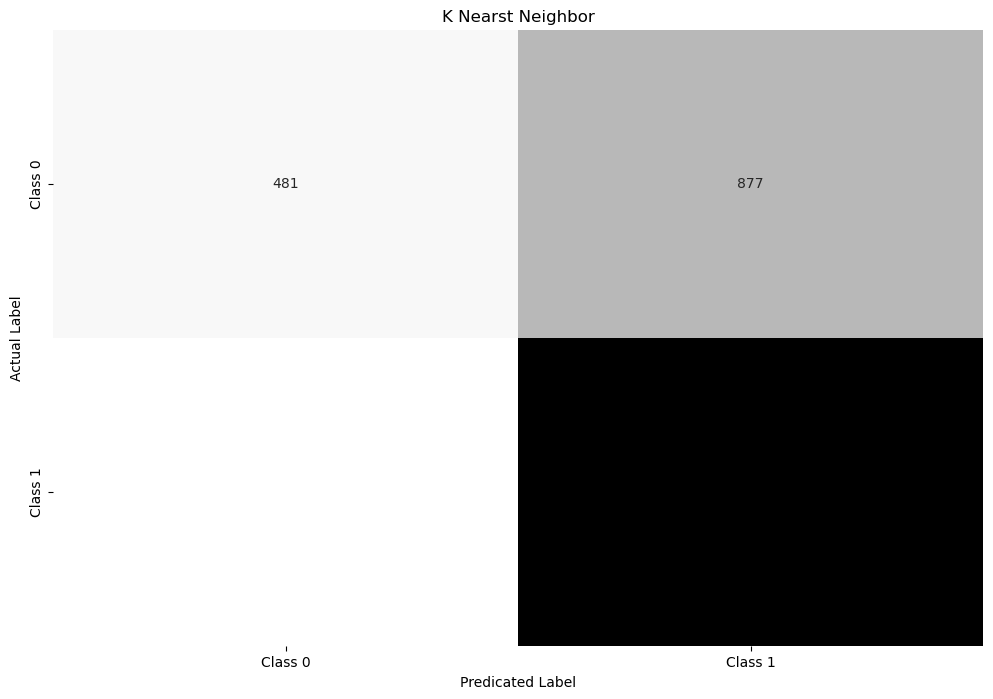

In [24]:
cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("K Nearst Neighbor")
plt.show()


## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(
    kernel ="linear",
    C = 1.0,
    degree = 3,
    gamma = "scale"
)
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
y_pred = svm.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", svm_accuracy*100)

Accuracy SVM: 66.57052962768746


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.20      0.30      1358
           1       0.68      0.92      0.78      2456

    accuracy                           0.67      3814
   macro avg       0.63      0.56      0.54      3814
weighted avg       0.65      0.67      0.61      3814



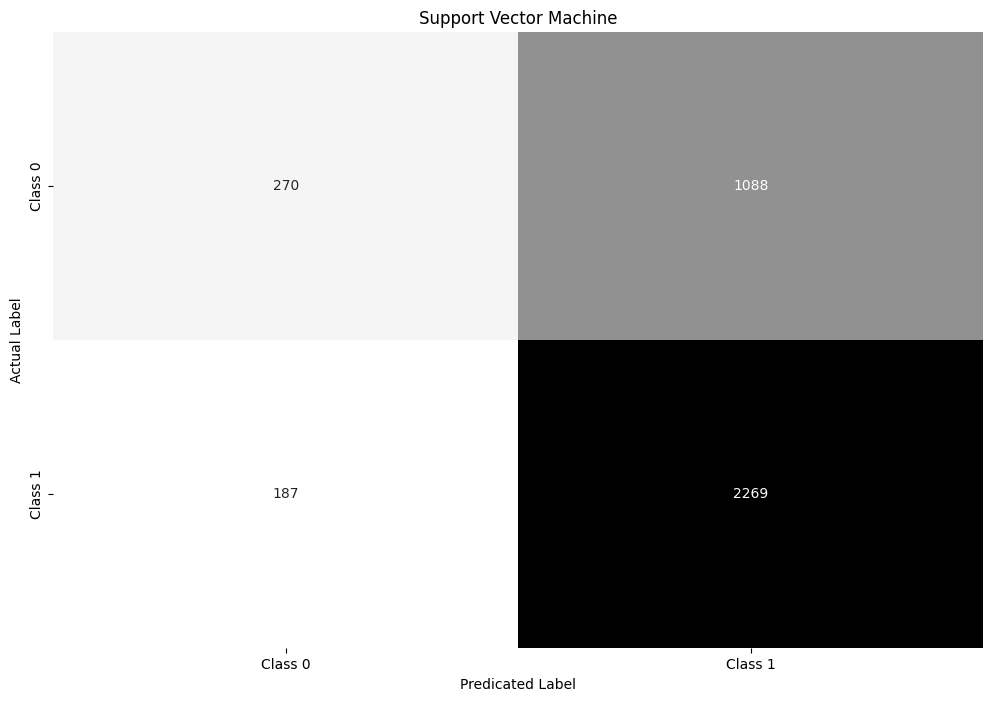

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("Support Vector Machine")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42
)
rdf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [29]:
Rfy_pred = rdf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rdf_accuracy = accuracy_score(Rfy_pred, y_test)
print("Accuracy RandomForest: ", rdf_accuracy*100)

Accuracy RandomForest:  65.52176192973256


In [31]:
print(classification_report(y_test, Rfy_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1358
           1       0.71      0.80      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.61      0.60      0.60      3814
weighted avg       0.64      0.66      0.64      3814



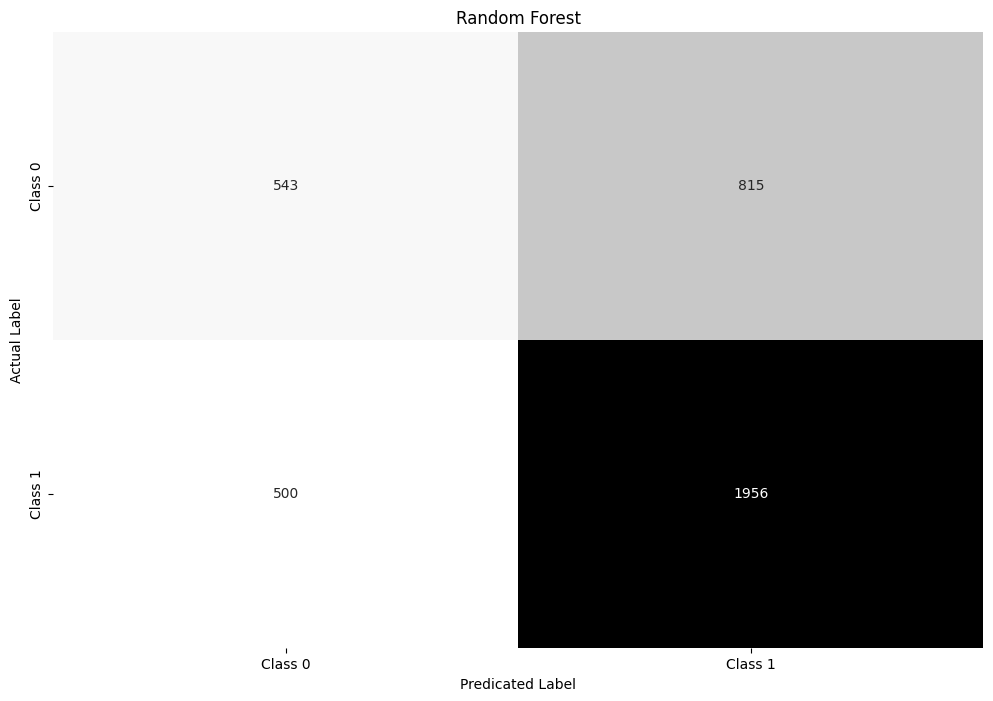

In [32]:
cm = confusion_matrix(y_test, Rfy_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("Random Forest")
plt.show()

## XGBoost

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 100,
    random_state = 42,
    use_label_encoder=False,
    eval_metric = 'logloss'
)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
xgbY_pred = xgb.predict(x_test)

In [36]:
xgb_accuracy = accuracy_score(xgbY_pred, y_test)
print("Accuracy XGBoost :",xgb_accuracy*100)

Accuracy XGBoost : 65.04981646565285


In [37]:
print("Classification Report:")
print(classification_report(y_test, xgbY_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.38      0.44      1358
           1       0.70      0.80      0.75      2456

    accuracy                           0.65      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.63      0.65      0.64      3814



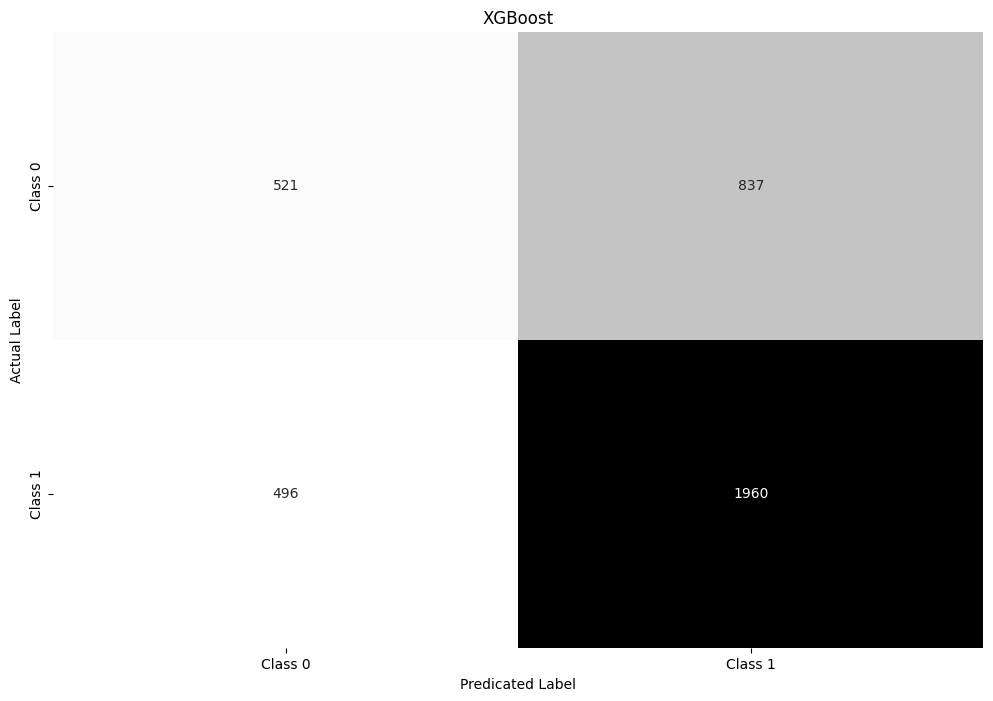

In [38]:
cm = confusion_matrix(y_test, xgbY_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("XGBoost")
plt.show()

In [39]:
print(f"KNN Accuracy: {Knn_accuracy*100}")
print(f"SVM Accuracy: {svm_accuracy*100}")
print(f"Random Forest Accuracy: {rdf_accuracy*100}")
print(f"XGBoost Accuracy: {xgb_accuracy*100}")

KNN Accuracy: 65.5742003146303
SVM Accuracy: 66.57052962768746
Random Forest Accuracy: 65.52176192973256
XGBoost Accuracy: 65.04981646565285


### Deployed in HuggingFace link: https://huggingface.co/spaces/Kabil007/EngineHealth.care

# 🏁  🏁  🏁  🏁  🏁  🏁  🏁 - FINISH - 🏁  🏁  🏁  🏁  🏁  🏁  🏁